**Celem projektu jest implementacja algorytmu gradientu prostego oraz zastosowanie go do znalezienia minimów funkcji**

In [ ]:
Maciej Łodziński  
Laboratiorium nr.2 - WSI

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from random import uniform

In [7]:
class Solver:
    def __init__(self, _alpha, _iterations):
        self.alpha = _alpha
        self.iterations = _iterations
        
    def get_parameters(self):
        return {"alpha":self.alpha, "iterations":self.iterations}
    
    def solve(self, compute_gradient_function, x):
        history = [x]

        for i in range(self.iterations):
            gradient = compute_gradient_function(x)
            x = x - self.alpha * gradient
            history.append(x)

        return x, np.array(history) 

In [8]:
def f(x):
    return x**4/4

def g(x):
    return 2 - np.exp(-x[0]**2 - x[1]**2) - 0.5*np.exp(-(x[0]+1.5)**2 - (x[1]-2)**2)

def compute_gradient_f(x):
    return x**3

def compute_gradient_g(x):
    e1 = 2*x[0]*np.exp(-x[0]**2 - x[1]**2) + (x[0]+1.5)*np.exp(-(x[0]+1.5)**2 - (x[1]-2)**2)
    e2 = 2*x[1]*np.exp(-x[0]**2 - x[1]**2) + (x[1]-2)*np.exp(-(x[0]+1.5)**2 - (x[1]-2)**2)
    return np.array([e1,e2])

In [9]:
def draw_function_2D(start, stop, sampling, function_name, history):
    x = np.linspace(start, stop, sampling)
    plt.plot(x, function_name(x))
    plt.plot(history, function_name(history))
    plt.show()


def get_axis_values_from_history(history, function_name):
    xh = [element[0] for element in history]
    yh = [element[1] for element in history]
    zh = [function_name([i, j]) for i,j in history]
    return [xh, yh, zh]

def draw_function_3D(start, stop, sampling, function_name, history, is_surface):
    x_data = y_data = np.linspace(start, stop, sampling)
    x, y = np.meshgrid(x_data, y_data)
    z = function_name([x, y])

    axis_values = get_axis_values_from_history(history, function_name)

    if (not is_surface):
        plt.contour(x, y, z)
        plt.scatter(axis_values[0], axis_values[1])
    else:
        ax = plt.axes(projection='3d')
        ax.plot_surface(x, y, z, cmap='plasma')
        ax.scatter3D(axis_values[0], axis_values[1], axis_values[2])

    plt.show()

Tak prezentują się nasze funkcje...

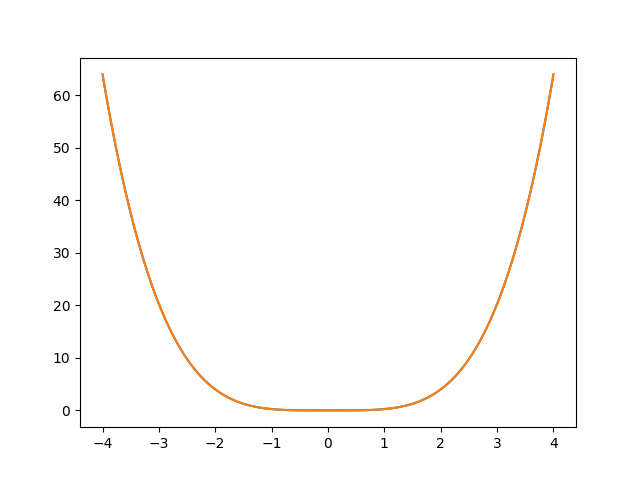

In [6]:
draw_function_2D(-4, 4, 100, f, 0)

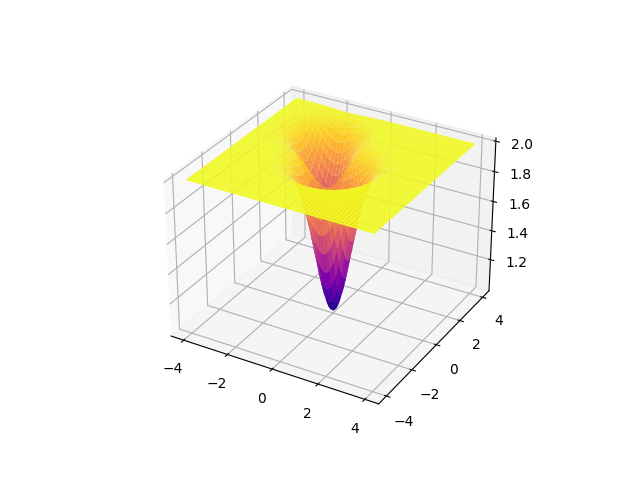

In [8]:
draw_function_3D(-4, 4, 100, g, [], True)

Sprawdźmy teraz działanie algorytmu przy różnych wartościach hiperparametru alpha dla różnych losowych punktów początkowych.  
Z założenia wraz ze wzrostem alpha'y powinna maleć liczba iteracji potrzebna do znalezienia minimum. Może się jednak zdażyć,  
że parametr będzie na tyle duży, że z każdą interacją algorytm bedzie przeskakiwał nad minimum i się od niego oddalał w nieskończoność.

# 2D

In [12]:
def test_2D(alpha):
    x = uniform(-5,5)
    solver = Solver(alpha, 100)
    res, history = solver.solve(compute_gradient_f, x)
    draw_function_2D(-4, 4, 200, f, history)

    print(f'starting point-> {round(x, 3)}')
    print(f'final point-> {round(res, 3)}')


**Alpha = 0.01**

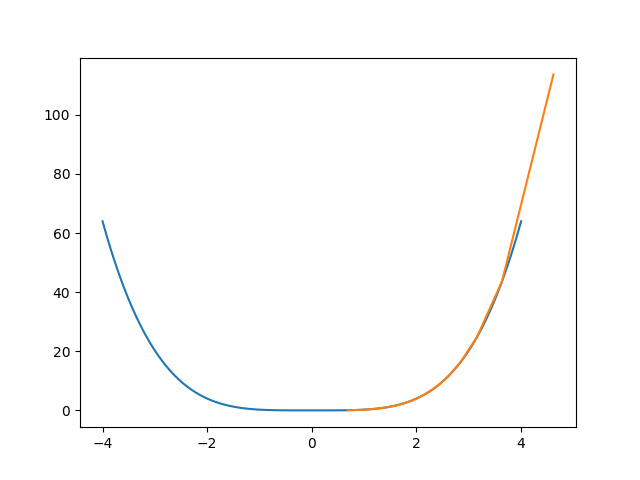

starting point-> 4.618
final point-> 0.689


In [13]:
test_2D(0.01)

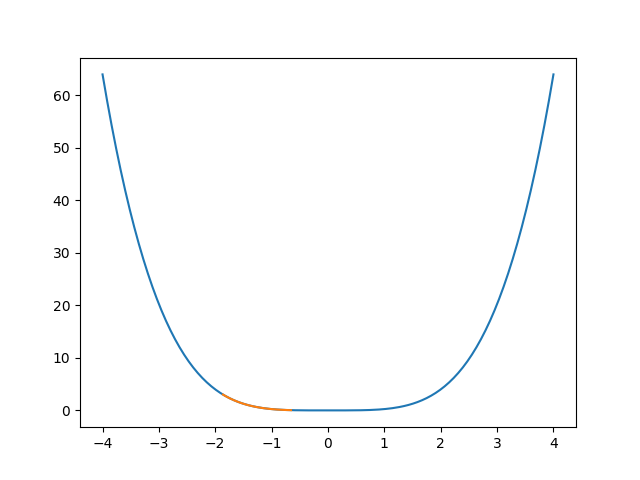

starting point-> -1.863
final point-> -0.657


In [16]:
test_2D(0.01)

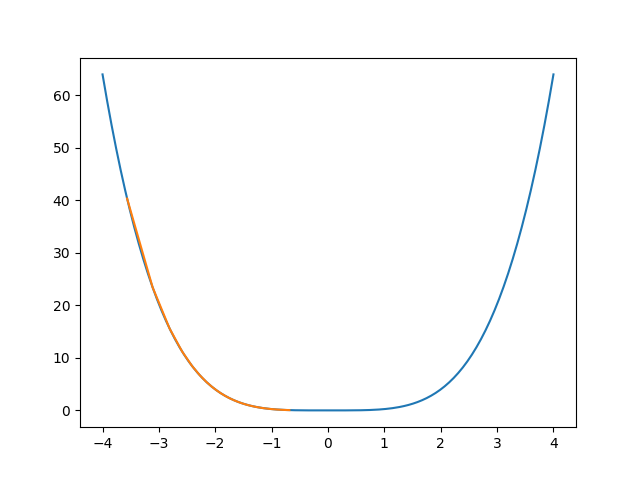

starting point-> -3.564
final point-> -0.685


In [17]:
test_2D(0.01)

**Alpha = 0.2**

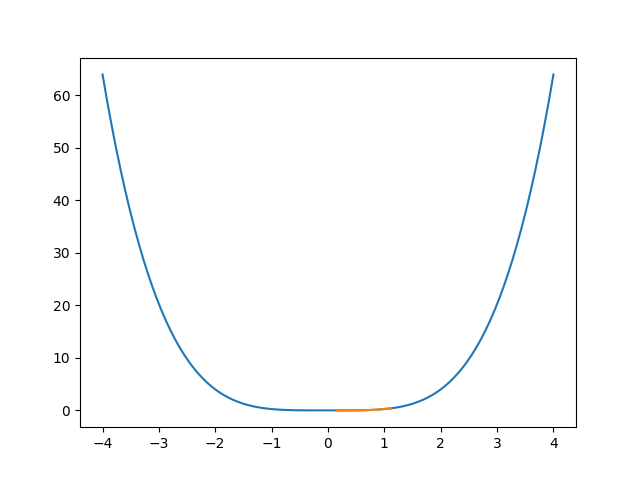

starting point-> 1.125
final point-> 0.154


In [26]:
test_2D(0.2)

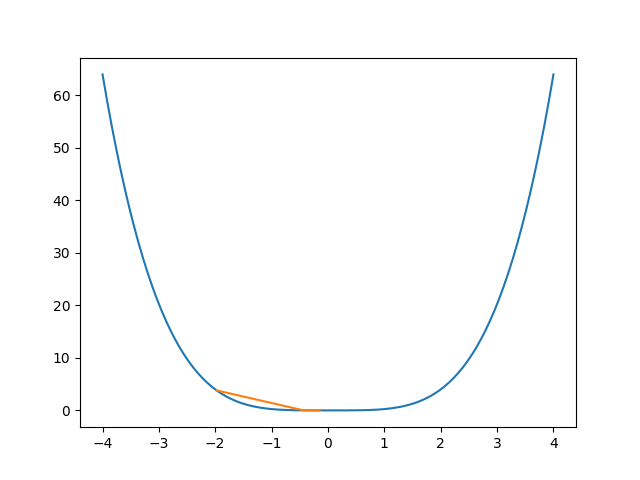

starting point-> -1.975
final point-> -0.148


In [32]:
test_2D(0.2)

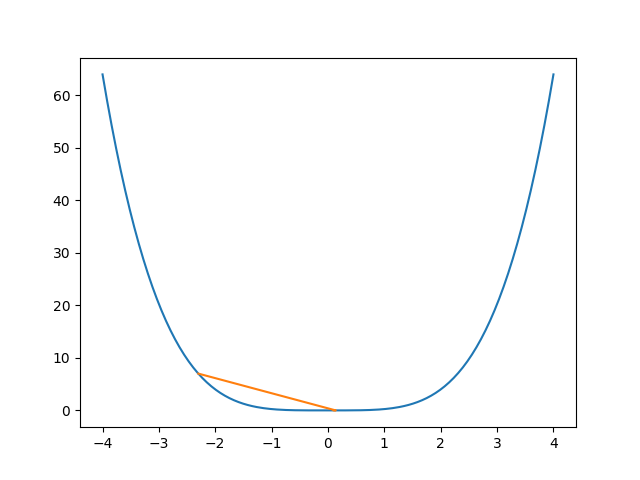

starting point-> -2.301
final point-> 0.103


In [37]:
test_2D(0.2)

Z powyższych wykresów można wywnioskować że alpha=0.2 podchodzi pod maksymalną nadajacą się do tego przypadku, ponieważ  
widać tu przeskakiwanie nad minimum, a zwiększanie tej wartosci powoduje błąd programu spowodowany zbieganiem algorytmu do   
nieskończoności. Alpha równa 0.01 dobrze sobie radzi ale zgodnie z przewidywaniami zbiega do minimum wolniej.

# 3D

In [40]:
def test_3D(alpha):
    solver = Solver(alpha, 100)
    x = uniform(-3,3)
    y = uniform(-3,3)
    res, history = solver.solve(compute_gradient_g, [x, y])
    draw_function_3D(-4, 4, 200, g, history, False)

    print(f'starting point-> {round(x, 3)}, {round(y, 3)}')
    print(f'final point-> {round(res[0], 3)}, {round(res[1], 3)}')

**Alpha = 0.1**

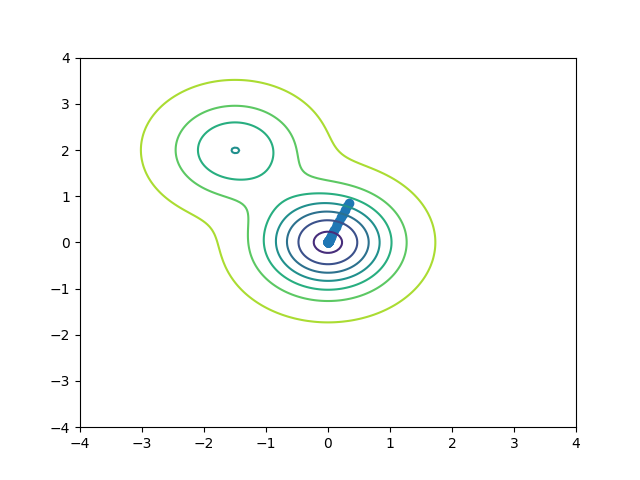

starting point-> 0.332, 0.852
final point-> -0.001, 0.002


In [41]:
test_3D(0.1)

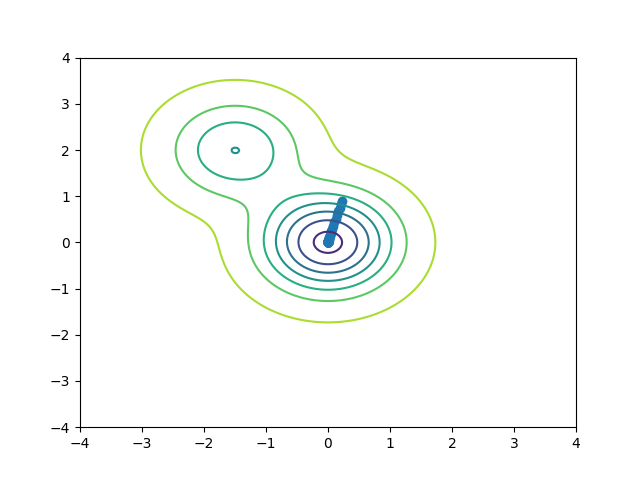

starting point-> 0.232, 0.903
final point-> -0.001, 0.002


In [42]:
test_3D(0.1)

**Alpha = 1.0**

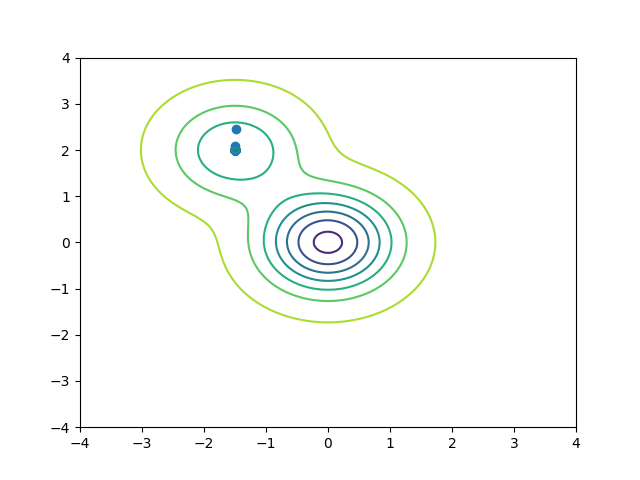

starting point-> -1.489, 2.463
final point-> -1.494, 1.992


In [49]:
test_3D(1)

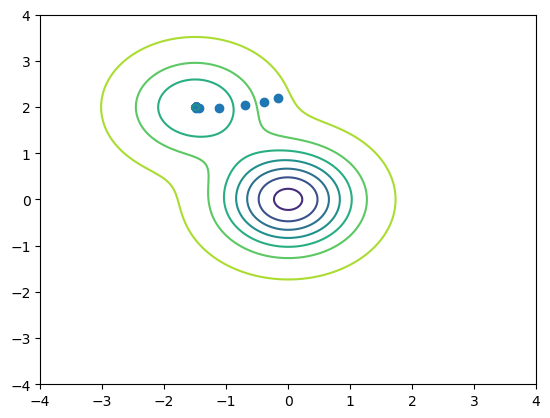

starting point-> -0.172, 2.187

final point-> -1.494, 1.992


In [265]:
test_3D(1)

**Alpha = 5.0**

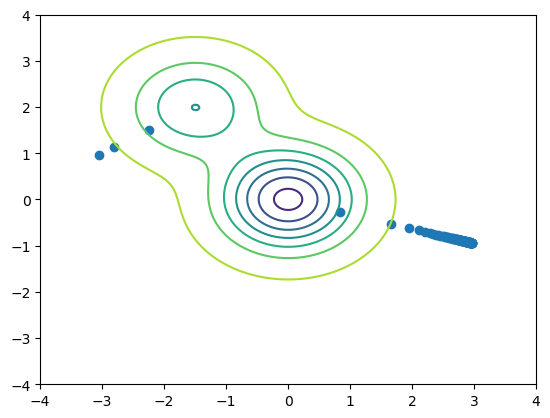

starting point-> 2.965, -0.942

final point-> -2.251, 1.498


In [266]:
test_3D(5)

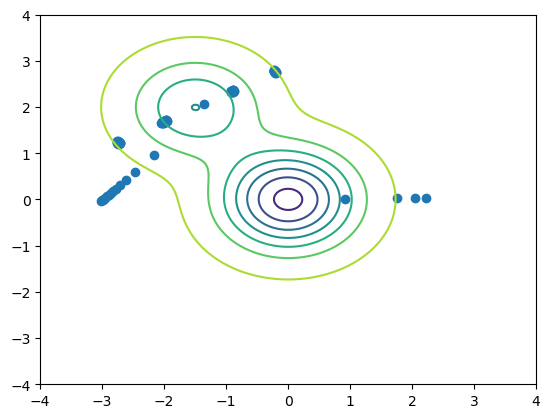

starting point-> 2.215, 0.027

final point-> -0.229, 2.798


In [267]:
test_3D(5)

# Wnioski
Jako że powyższa funkcja posiada 2 minima globalne to algorytm zbiega do różnych wartości w zależnosci od punktu początkowego.  
Jeśli ów punkt początkowy znajduje się "poza" obrębami widocznej funkcji (na płaskiej powierzchni) to algorytm nie wie gdzie iść,  
ponieważ nigdzie nie widzi tytułowego gradientu. Im wyższa wartość hiperparametru alpha'y tym punkt końcowy jest mniej dokładny ale algorytm szybciej go znajduje.  